<a href="https://colab.research.google.com/github/clarentcelsia/PyML/blob/master/deeplearning/tf_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

In [3]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


# Transfer Learning

Building a new model using weights from pre-trained model that has been trained on task and on dataset. 

It can be reused in condition whereas the dataset of the pre-trained model (called 1st task) has similar features with the new task (2nd task).

<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/classifiers-transfer-learning.jpeg" width=450/> 


**Some pre-trained architecture**

Ex: ResNet, VGG16, https://keras.io/api/applications/ (Image Classification), BERT (NLP)

## Transfer Learning for Computer Vision

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
img_folder = '/content/drive/MyDrive/Datasets/Temp'

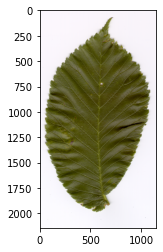

In [5]:
img_files = os.listdir(img_folder)

for items in img_files:
  plt.imshow(mpimg.imread(os.path.join(img_folder, items)))
  plt.show()

In [11]:
# Define a model and pretrained weights
model = ResNet50(weights='imagenet') # input_shape of resnet (224,224,3)

# Image preprocessing
imge = image.load_img(
    path=os.path.join(img_folder, img_files[0]),
    # grayscale=True, # Convert to grayscale.
    target_size=(224, 224) # Resize
)
imge_arr = image.img_to_array(imge)
imge_arr = np.expand_dims(imge_arr, axis=0)
imge_arr = preprocess_input(imge_arr) # encode image

preds = model.predict(imge_arr)

decode_preds = decode_predictions(preds, top=10) # show top 10 guessed words
decode_preds

[[('n03887697', 'paper_towel', 0.1513108),
  ('n03065424', 'coil', 0.09729593),
  ('n04507155', 'umbrella', 0.07108282),
  ('n07753592', 'banana', 0.054469287),
  ('n02869837', 'bonnet', 0.051279075),
  ('n15075141', 'toilet_tissue', 0.049766462),
  ('n04033901', 'quill', 0.045321606),
  ('n01768244', 'trilobite', 0.043390606),
  ('n03207743', 'dishrag', 0.03538062),
  ('n01968897', 'chambered_nautilus', 0.03010393)]]

Create a model with required layer:

You can save the model above (e.g h5 file) and create a new model with output same as your previous model with different layer https://stackoverflow.com/questions/49546922/keras-replacing-input-layer

## Transfer Learning For NLP

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 10.0 MB/s 
     |████████████████████████████████| 6.6 MB 48.8 MB/s 
     |████████████████████████████████| 101 kB 13.1 MB/s 
     |████████████████████████████████| 596 kB 57.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
from transformers import pipeline

In [5]:
# Init pipeline with default model
classifier = pipeline('sentiment-analysis')
classifier('I hate you!') # >>> label - 

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


[{'label': 'NEGATIVE', 'score': 0.9987472295761108}]

In [10]:
#Init pipeline with selected model
classifier = pipeline('sentiment-analysis', model='siebert/sentiment-roberta-large-english')
# Performing sentiment analysis on below text
classifier('I love you!')

[{'label': 'POSITIVE', 'score': 0.9987329840660095}]

# Full Code

In [1]:
# Download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-07-07 01:14:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.128, 74.125.139.128, 74.125.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   116MB/s    in 0.6s    

2022-07-07 01:14:37 (116 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
# Extract zip file
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/')
zip_ref.close()

In [3]:
# Define directory
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
# Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 25

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = batch_size,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size = batch_size,  
                                                        class_mode = 'binary',
                                                        target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# Define model

# Here we gonna use the saved weight 
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


--2022-07-07 01:14:42--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 173.194.218.128, 108.177.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   219MB/s    in 0.4s    

2022-07-07 01:14:43 (219 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [6]:
# Here we use InceptionV3 with the given weights
from tensorflow.keras.applications.inception_v3 import InceptionV3

model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = None)
model.load_weights(local_weights_file)
model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [7]:
# Freeze the weights of layers
  # Not allowed to modify the pre trained W with the current training

for layer in model.layers:
  layer.trainable = False

In [8]:
# mixed_7 as the last layer we use from pre-trained model then add our own layer
last_ = model.get_layer('mixed7')
last_output = last_.output

In [9]:
print(last_.output_shape)

(None, 7, 7, 768)


In [10]:
# Create new layer
from tensorflow.keras import Model
from tensorflow.keras import layers

# Flatten the last output from pre trained model to 1D 
x = layers.Flatten()(last_output)

# Add a fully connected layer with 1,024 hidden units and ReLU activation after flattening
x = layers.Dense(name="FC", units=1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Sigmoid layer for classification
x = layers.Dense(name="Output", units=1, activation='sigmoid')(x)

In [11]:
# Append the last pretrained model to new created model
new_model = Model(inputs=model.input, outputs=x)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [12]:
new_model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [13]:
# Fit training set to model
  # Not gonna specify batch_size if your data is in the form of generators/sequences/datasets
  # Because their own parameter already generates batch_size itself

# nb. steps per epoch (training) and validation steps should be equal to the total number of data points divided by batch_size
result = new_model.fit(train_generator,
              validation_data=validation_generator,
              steps_per_epoch = int(2000/batch_size), # n trained image = steps per epoch * epochs 
              validation_steps = int(1000/batch_size), 
              epochs = 10) 

Epoch 1/10
80/80 [==============================] - 146s 2s/step - loss: 0.6557 - accuracy: 0.8600 - val_loss: 0.1105 - val_accuracy: 0.9580
Epoch 2/10
80/80 [==============================] - 138s 2s/step - loss: 0.2084 - accuracy: 0.9180 - val_loss: 0.1079 - val_accuracy: 0.9550
Epoch 3/10
80/80 [==============================] - 139s 2s/step - loss: 0.1672 - accuracy: 0.9260 - val_loss: 0.1263 - val_accuracy: 0.9520
Epoch 4/10
80/80 [==============================] - 139s 2s/step - loss: 0.1744 - accuracy: 0.9270 - val_loss: 0.0938 - val_accuracy: 0.9660
Epoch 5/10
80/80 [==============================] - 139s 2s/step - loss: 0.1282 - accuracy: 0.9515 - val_loss: 0.0999 - val_accuracy: 0.9620
Epoch 6/10
80/80 [==============================] - 139s 2s/step - loss: 0.1422 - accuracy: 0.9385 - val_loss: 0.0881 - val_accuracy: 0.9650
Epoch 7/10
80/80 [==============================] - 140s 2s/step - loss: 0.1523 - accuracy: 0.9390 - val_loss: 0.1359 - val_accuracy: 0.9460
Epoch 8/10
80

In [17]:
# Visualize
import matplotlib.pyplot as plt

acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

In [18]:
epochs = range(len(acc))
epochs

range(0, 10)

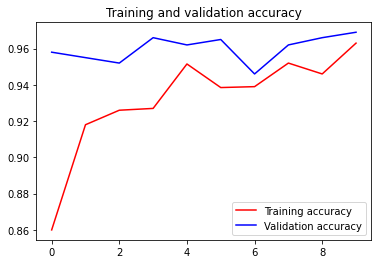

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()